In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

In [3]:
data = pd.read_csv('merged_consommation.csv')
data

,Unnamed: 0,type_avion,age_avion,nombre_passagers,consommation_carburant
0,0,A320,2011.0,163.0,0.579232
1,1,A320,2011.0,163.0,0.597330
2,2,A320,2011.0,163.0,0.651342
3,3,A320,2011.0,163.0,0.819361
4,4,A320,NaN,NaN,0.698643
...,...,...,...,...,...
2343,88,B738,2018.0,189.0,1.095160
2344,89,B738,2018.0,189.0,0.961705
2345,90,B738,2017.0,189.0,0.670580
2346,91,B738,2017.0,189.0,0.944837


In [4]:


df_passagers = data.filter(items=['nombre_passagers','consommation_carburant'])
df_type = data.filter(items = ['type_avion','consommation_carburant'] )
df_age = data.filter(items = ['age_avion','consommation_carburant'] )


df_passagers.dropna(subset=['nombre_passagers'], inplace=True)
df_passagers

,nombre_passagers,consommation_carburant
0,163.0,0.579232
1,163.0,0.597330
2,163.0,0.651342
3,163.0,0.819361
20,150.0,0.676324
...,...,...
2343,189.0,1.095160
2344,189.0,0.961705
2345,189.0,0.670580
2346,189.0,0.944837


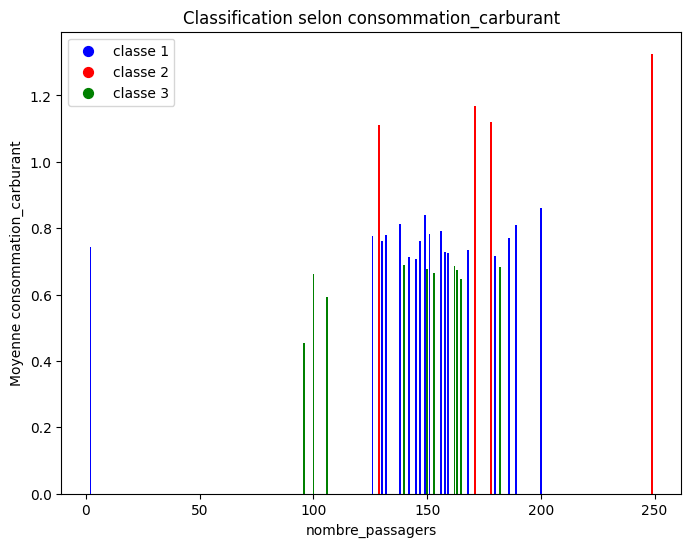

In [5]:
grouped_data = data.groupby('nombre_passagers')['consommation_carburant'].mean().reset_index()
    
kmeans = KMeans(n_clusters=3)
kmeans.fit(grouped_data[['consommation_carburant']])
labels = kmeans.labels_

# Définition des couleurs et textes pour chaque label de cluster
colors = {0: ('b', 'classe 1'), 1: ('r', 'classe 2'), 2: ('g', 'classe 3')}


# Plot des résultats avec coloration selon le cluster
fig, ax = plt.subplots(figsize=(8, 6))
for i, label in enumerate(labels):
    color, _ = colors[label]
    ax.bar(grouped_data['nombre_passagers'][i], grouped_data['consommation_carburant'][i], color = color)
    #plt.scatter(grouped_data['type_avion'][i], grouped_data['emission_co2'][i], c=color)


# Création de la légende à partir du dictionnaire de couleurs
legend_handles = [plt.scatter([], [], marker='o', s=50, c=color, label=text) for _, (color, text) in colors.items()]
ax.legend(handles=legend_handles)
ax.set_xlabel('nombre_passagers')
ax.set_ylabel('Moyenne '+'consommation_carburant')
ax.set_title('Classification selon '+'consommation_carburant')
plt.show()